In [2]:
# importing all the dictionaries
import pandas as pd
import os

df_accord = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//Poster 1//youtube_comments_redline_accord_review.csv")
df_accord.head()

,id,user,date,timestamp,commentText,likes,hasReplies,numberOfReplies,replies.id,replies.user,replies.date,replies.timestamp,replies.commentText,replies.likes
0,UgwijGlmM1wXg9YF9Tl4AaABAg,Redline Reviews,1 year ago,1.523821e+12,Hey guys! There is a way you can leave the tac...,474.0,True,64.0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgwijGlmM1wXg9YF9Tl4AaABAg.8YCRZnyKORA8YCb60jFozG,Jia L.,1 year ago,1.523821e+12,Hey there! Do you think the 2018 Accord Tourin...,11.0
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgwijGlmM1wXg9YF9Tl4AaABAg.8YCRZnyKORA8YCiRlyzawB,Battosai Jenkins,1 year ago,1.523821e+12,"@Redline Reviews, Hi at 21:21 you completely f...",3.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgwijGlmM1wXg9YF9Tl4AaABAg.8YCRZnyKORA8YCjR8i8DVr,manuel meza,1 year ago,1.523821e+12,"Good, I was going to say it would be pretty an...",1.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,UgwijGlmM1wXg9YF9Tl4AaABAg.8YCRZnyKORA8YCtIaKTOMa,Emet Playz,1 year ago,1.523821e+12,The sound reminded me of a type r,1.0


Now in the next step we will convert all text to lower case and remove all the punctuation

In [3]:
# removing redundant rows
df_accord = df_accord.dropna(subset=['hasReplies'])

# also removing redundant columns
df_accord = df_accord.drop(columns=['id', 'user', 'date', 'timestamp', 'likes', 'hasReplies', 'numberOfReplies', 'replies.id', 'replies.user', 'replies.date', 'replies.timestamp', 'replies.commentText', 'replies.likes'], axis=1)

# print the head
df_accord.head()

,commentText
0,Hey guys! There is a way you can leave the tac...
65,Make it a hatchback and it massively trumps an...
66,wtf whats wrong with all cars brands they skip...
67,beautiful ride
68,"Dude, the car looks beautiful. Honda keeps on ..."


In [4]:
df_accord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 3551
Data columns (total 1 columns):
commentText    2155 non-null object
dtypes: object(1)
memory usage: 33.7+ KB


In [5]:
# Load the regular expression library
import re

# Remove punctuation
df_accord['commentText_processed'] = df_accord['commentText'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
df_accord['commentText_processed'] = df_accord['commentText_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
df_accord['commentText_processed'].head()

0     hey guys there is a way you can leave the tach...
65    make it a hatchback and it massively trumps an...
66    wtf whats wrong with all cars brands they skip...
67                                       beautiful ride
68    dude the car looks beautiful honda keeps on su...
Name: commentText_processed, dtype: object

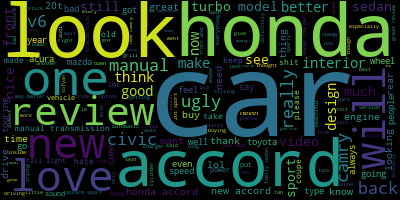

In [7]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(df_accord['commentText_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="black", max_words=5000,contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

For performing LDA the text present in the documents need to be vectorized. In the next step we will vectorize the text and then plot the 10 most common words in the document.

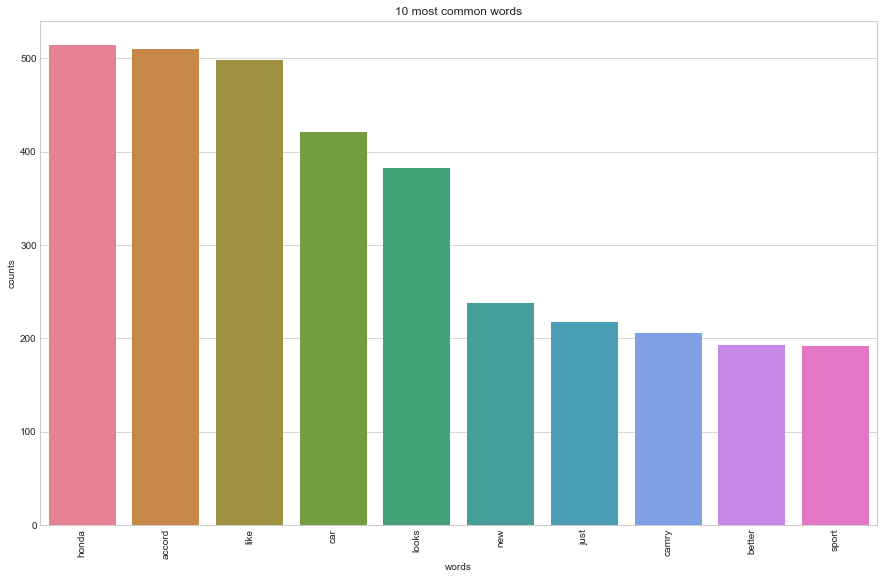

In [8]:
# Load the library with the CountVectorizer method
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Helper function
def plot_10_most_common_words(count_data, count_vectorizer):
    import matplotlib.pyplot as plt
    words = count_vectorizer.get_feature_names()
    total_counts = np.zeros(len(words))
    for t in count_data:
        total_counts+=t.toarray()[0]
    
    count_dict = (zip(words, total_counts))
    count_dict = sorted(count_dict, key=lambda x:x[1], reverse=True)[0:10]
    words = [w[0] for w in count_dict]
    counts = [w[1] for w in count_dict]
    x_pos = np.arange(len(words)) 
    
    plt.figure(2, figsize=(15, 15/1.6180))
    plt.subplot(title='10 most common words')
    sns.set_context("notebook", font_scale=1.25, rc={"lines.linewidth": 2.5})
    sns.barplot(x_pos, counts, palette='husl')
    plt.xticks(x_pos, words, rotation=90) 
    plt.xlabel('words')
    plt.ylabel('counts')
    plt.show()

# Initialise the count vectorizer with the English stop words
count_vectorizer = CountVectorizer(stop_words='english')

# Fit and transform the processed titles
count_data = count_vectorizer.fit_transform(df_accord['commentText_processed'])

# Visualise the 10 most common words
plot_10_most_common_words(count_data, count_vectorizer)

In [9]:
# get all the comment text into one list which can be used for performing next steps
text_list = list(df_accord['commentText_processed'])

# Preprocessing - Create Term Frequency Matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, ENGLISH_STOP_WORDS

EXTRA_STOP_WORDS_1 = ["honda", "car", "accord", "like", "looks", "new", "just", "does", "lol", "2018"]
EXTRA_STOP_WORDS_2 = ["honda", "car", "accord", "like", "looks", "new", "just", "does", "lol", "2018", "2017", "don"]
stopwords = ENGLISH_STOP_WORDS.union(EXTRA_STOP_WORDS_2)

# LDA can only use raw term counts for LDA
# initially we 
tf_vectorizer = CountVectorizer(max_df=0.95, \
                min_df=50, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(text_list)

# each feature is a word (bag of words)
# get_feature_names() gives all words
tf_feature_names = tf_vectorizer.get_feature_names()

print(tf_feature_names[0:10])
print(tf.shape)

# split dataset into train (90%) and test sets (10%)
# the test sets will be used to evaluate proplexity of topic modeling
X_train, X_test = train_test_split(\
                tf, test_size=0.1, random_state=0)

['20', '20t', 'bad', 'better', 'buy', 'camry', 'cars', 'charger', 'civic', 'design']
(2155, 42)


In [10]:
# Train LDA model
from sklearn.decomposition import LatentDirichletAllocation

num_topics = 2

# Run LDA. For details, check
# http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.LatentDirichletAllocation.html#sklearn.decomposition.LatentDirichletAllocation.perplexity

# max_iter control the number of iterations 
# evaluate_every determines how often the perplexity is calculated
# n_jobs is the number of parallel threads
lda = LatentDirichletAllocation(n_components=num_topics, \
                                max_iter=20,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(X_train)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\sklearn\decomposition\online_lda.py:536: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


iteration: 1 of max_iter: 20, perplexity: 44.5934
iteration: 2 of max_iter: 20, perplexity: 43.8417
iteration: 3 of max_iter: 20, perplexity: 43.4854
iteration: 4 of max_iter: 20, perplexity: 43.2846
iteration: 5 of max_iter: 20, perplexity: 43.1559
iteration: 6 of max_iter: 20, perplexity: 43.0669


In [11]:
# Check topic and word distribution per topic

num_top_words=20

# lda.components_ returns a KxN matrix
# for word distribution in each topic.
# Each row consists of 
# probability (counts) of each word in the feature space

for topic_idx, topic in enumerate(lda.components_):
    print ("Topic %d:" % (topic_idx))
    # print out top 20 words per topic 
    words=[(tf_feature_names[i],topic[i]) \
           for i in topic.argsort()[::-1][0:num_top_words]]
    print(words)
    print("\n")

Topic 0:
[('camry', 169.01231879294906), ('sport', 163.72052635265572), ('review', 135.0754343270471), ('v6', 122.88544308297746), ('turbo', 109.2541061322944), ('great', 99.63488348947826), ('civic', 98.7812264392269), ('interior', 91.906878878704), ('20t', 91.04513424143161), ('looking', 82.28060078560581), ('toyota', 67.17894452180758), ('engine', 63.08019177727262), ('better', 57.46542914440127), ('speed', 56.44739098041768), ('did', 52.27391315087301), ('20', 51.060892564545775), ('think', 49.878188609657315), ('video', 47.90553719469826), ('charger', 47.73314148391447), ('going', 44.6170475620799)]


Topic 1:
[('manual', 143.6167068735313), ('look', 133.65752879887916), ('better', 113.86617830651808), ('love', 111.11648987791395), ('ugly', 109.93332301586376), ('good', 98.82976001977272), ('rear', 94.81571430572559), ('really', 91.89845474323982), ('design', 86.96154657076207), ('nice', 80.47598728804277), ('way', 76.12989553820651), ('sedan', 66.0216139914568), ('cars', 63.00993

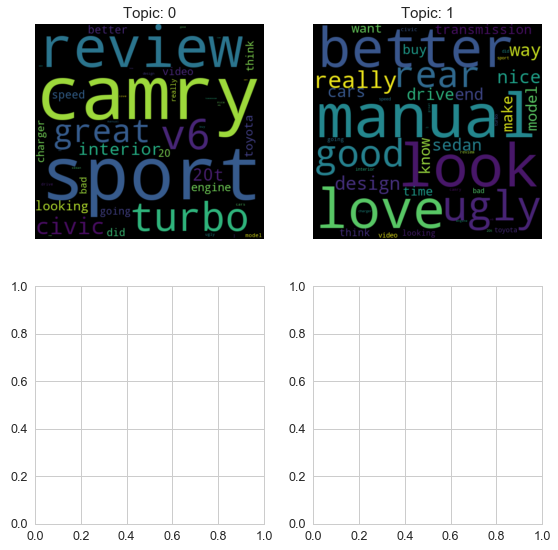

In [12]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import math

num_top_words=50
f, axarr = plt.subplots(2, 2, figsize=(8, 8));

for topic_idx, topic in enumerate(lda.components_):
    # create a dataframe with two columns (word, weight) for each topic
    
    # create a word:count dictionary
    f={tf_feature_names[i]:topic[i] for i in topic.argsort()[::-1][0:num_top_words]}
    
    # generate wordcloud in subplots
    wordcloud = WordCloud(width=480, height=450, margin=0, background_color="black");
    _ = wordcloud.generate_from_frequencies(frequencies=f);
    
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].imshow(wordcloud, interpolation="bilinear");
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].set_title("Topic: "+str(topic_idx));
    _ = axarr[math.floor(topic_idx/2), topic_idx%2].axis('off')

plt.tight_layout()
plt.show()

In [13]:
# Exercise 5.1.1 How to find the best number of topics?
# Vary variable num_topics, e.g. set it to 2, 3, 5, ...
# For each value, train LDA model, 
# calculate perplexity on the test data

import numpy as np
import matplotlib.pyplot as plt

result=[]
for num_topics in range(2,15):
    lda = LatentDirichletAllocation(n_components=num_topics, \
                                learning_method='online', \
                                max_iter=10,verbose=0, n_jobs=1,
                                random_state=0).fit(X_train)
    p=lda.perplexity(X_test)
    result.append([num_topics,p])
    print(num_topics, p)

2 56.873977846818676
3 66.59868931177577
4 70.04297580857907
5 76.14070507845145
6 85.12628397511843
7 82.71707112979101
8 83.6625781192322
9 97.91984801040425
10 95.42479268789495
11 93.95328556557833
12 97.09140469292319
13 100.24634024396211
14 107.25025617374881


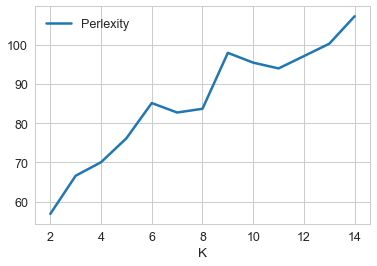

In [14]:
import pandas as pd
pd.DataFrame(result, columns=["K", "Perlexity"]).plot.line(x='K',y="Perlexity");
plt.show();

In [15]:
# 6.1. Create LDA model using the same TF matrix generated from sklearn

import gensim
from gensim import corpora

# A corpus is TF matrix in the list format, e.g.:
# [[(0, 1), (1,2), (4, 1), ...], [...], ...]
# which shows the first document has words with id=0,1,4
# and the count of word 0 is 1, word 1 is 2, ...

# convert the gensim corpus from the sparse tf matrix
corpus = gensim.matutils.Sparse2Corpus(X_train, documents_columns=False)

# create the mapping between id and words
id2word={idx:w for idx, w in enumerate(tf_vectorizer.get_feature_names())}

# create a gensim dictionary from the corpus
# a dictionary contains the frequency of each words 
# the mapping between ids and words
dictionary = corpora.Dictionary.from_corpus(corpus, id2word=id2word)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\gensim\utils.py:1212: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


In [16]:
# 6.2. Train LDA model

NUM_TOPICS = 2

# for detailed parameters, check
#https://radimrehurek.com/gensim/models/ldamodel.html

ldamodel = gensim.models.ldamodel.LdaModel(corpus, alpha='auto', num_topics = NUM_TOPICS, \
                                           id2word=id2word, iterations=15)

topics = ldamodel.print_topics(num_words=20)
for topic in topics:
    print(topic)

(0, '0.069*"camry" + 0.065*"manual" + 0.049*"sport" + 0.046*"love" + 0.045*"better" + 0.044*"look" + 0.038*"rear" + 0.036*"ugly" + 0.029*"toyota" + 0.029*"v6" + 0.029*"nice" + 0.028*"way" + 0.028*"great" + 0.027*"turbo" + 0.024*"cars" + 0.024*"interior" + 0.023*"video" + 0.023*"sedan" + 0.022*"transmission" + 0.021*"think"')
(1, '0.049*"review" + 0.049*"better" + 0.044*"civic" + 0.043*"good" + 0.039*"sport" + 0.038*"20t" + 0.038*"v6" + 0.036*"looking" + 0.036*"really" + 0.032*"design" + 0.032*"look" + 0.028*"turbo" + 0.027*"engine" + 0.026*"ugly" + 0.026*"model" + 0.026*"interior" + 0.025*"speed" + 0.024*"great" + 0.024*"camry" + 0.024*"think"')


In [17]:
# 6.3. visualize topics

import pyLDAvis.gensim
lda_display = pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)
pyLDAvis.display(lda_display)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\pyLDAvis\_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=True'.

To retain the current behavior and silence the warning, pass sort=False

  return pd.concat([default_term_info] + list(topic_dfs))


In [ ]:
# Exercise 6.1. Use NLTK for Named Entity Recognition

from nltk import word_tokenize, pos_tag, ne_chunk
 
sentence = df_accord['commentText'][104] 

# the input to ne_chunk is list of (token, pos tag) tuples
ner_tree=ne_chunk(pos_tag(word_tokenize(sentence)))

# ne_chunk returns a tree
print(ner_tree)

# get PERSON out of the tree
person=[]
for t in ner_tree.subtrees():
    if t.label() == 'PERSON':
        person.append(t.leaves())
print("PERSON",person)

# how to extract organization?

In [ ]:
df_accord['commentText_processed'][104]

# Testing LDA Accuracy

In order to calculate the accuracy of LDA we need a set of test data that is labeled. To do this, firstly we will again split the data into training and test sets, download both the training and test sets. Assign topics to the test set, upload it again and test the accuracy.

Downloading both the training and test sets is important as the split is random and we will get different training and test sets each time we do the split. Hence, if we do not store the datasets, we will have to label the test sets each and everytime.

In [18]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from nltk.cluster import KMeansClusterer, cosine_distance
from sklearn.decomposition import LatentDirichletAllocation

import gensim
from gensim import corpora
from gensim.models.coherencemodel import CoherenceModel

import pandas as pd
from sklearn import metrics
import numpy as np
import json, time
from matplotlib import pyplot as plt

In [58]:
# # now we split the data from the accord dataset into train test splits and then we try to label the test data 
# from sklearn.cross_validation import train_test_split
# train_accord, test_accord = train_test_split(df_accord, test_size=0.1)

C:\Users\Gaurav\Anaconda3_New\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [59]:
# # exporting the train and test datasets to the system
# train_accord.to_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//train_accord_redline_v1.csv")
# test_accord.to_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//train_test_datasets//LDA//test_accord_redline_v1.csv")

In [20]:
# now importing the labelled test set and the train set
test_labelled = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//Poster 1//train_test_datasets//test_accord_redline_v1.csv")
train = pd.read_csv("C://Gaurav//Study//Spring 2019 Poster Presentation//Poster 1//train_test_datasets//LDA//train_accord_redline_v1.csv")

In [22]:
test_labelled

,Unnamed: 0,id,user,date,timestamp,commentText,Topic_Label,likes,hasReplies,Comment_Length,vader_compound_score,Sentiment
0,2115,Ugx1kSi-cC70JIo5CVR4AaABAg,Gabe Montenegro,1 year ago,1.520000e+12,How much will the 6speed manual 2.0T sport cost,Features/Design,0,False,47,0.0000,Neutral
1,1407,Ugxu6n-FBtEs80daFtd4AaABAg,42crazyguy,1 year ago,1.520000e+12,STOP MAKING IT BIGGER Fuck just stop I can't t...,General/Review,1,False,61,-0.8240,Negetive
2,219,UgyScuA3U0TrlL32pPF4AaABAg,britton coil,4 months ago,1.540000e+12,I was really disappointed about the interior q...,Features/Design,2,False,87,-0.5256,Negetive
3,525,UgxB0MXkpJPSVOfdHLN4AaABAg,Nikoh Narehh,10 months ago,1.530000e+12,Ugly!! Looks like a Malibu. Design looks hurri...,Competition/Other Cars,0,False,168,-0.8647,Negetive
4,2493,UgxT2tsQH8Jqurz1get4AaABAg,themessiah809,1 year ago,1.520000e+12,"I'm sorry, i just Can't get pass this car ugly...",Competition/Other Cars,12,True,288,-0.4215,Negetive
5,1439,UgzWOQXYvw6BdlbFyHx4AaABAg,Alexander Contreras,1 year ago,1.520000e+12,i think the new Camry is a better looking car ...,Competition/Other Cars,107,True,54,0.4404,Positive
6,2243,Ugyq80LnmoSaOG921294AaABAg,TheLifeOnHigh,1 year ago,1.520000e+12,This model is a beta tester. Wait for the 2019...,General/Review,2,False,54,0.0000,Neutral
7,348,Ugzr7byA2C-Av7kaF9x4AaABAg,drwho534,7 months ago,1.540000e+12,"Love the new Accord, hate that stuck-on tablet...",General/Review,0,True,502,0.3468,Positive
8,997,UgxGDU75aB85gcPi6rN4AaABAg,Viper 001,1 year ago,1.520000e+12,What's up with those tail lights Honda come on,Features/Design,0,False,46,0.0000,Neutral
9,1818,UgyR2dLjE8g6hav-SMV4AaABAg,Amazing Vazquez,1 year ago,1.520000e+12,The interior is nicer than the Camry,Competition/Other Cars,0,False,36,0.4404,Positive


In [23]:
#first_label=[item[0] for item in all_label]
label = list(test_labelled["Topic_Label"])

EXTRA_STOP_WORDS = ["nissan", "car", "altima", "like", "new"]
#EXTRA_STOP_WORDS_2 = ["nissan", "car", "altima", "like", "new", "don", "really", "just"]
stopwords = ENGLISH_STOP_WORDS.union(EXTRA_STOP_WORDS)

# LDA can only use raw term counts for LDA
# initially we 

# creating lists of train and test texts to be used further in the code
test_labelled = test_labelled.dropna(axis = 0)
train_list = list(train["commentText_processed"])
train_list_array = np.asarray(train_list)
test_text = list(test_labelled["commentText_processed"])
test_text_array = np.asarray(test_text)
train_test_list = train_list + test_text

tf_vectorizer = CountVectorizer(max_df=0.90, \
                min_df=50, stop_words=stopwords)
tf = tf_vectorizer.fit_transform(train_test_list)



# tf_vectorizer = CountVectorizer(min_df=5, stop_words='english')
# tf = tf_vectorizer.fit_transform(train+list(test_text))
 
num_clusters=2

lda = LatentDirichletAllocation(n_components=num_clusters, \
                                max_iter=20,verbose=1,
                                evaluate_every=1, n_jobs=1,
                                random_state=0).fit(tf[0:len(train)])

# lda = LatentDirichletAllocation(n_components=num_clusters, learning_method='batch',\
#                                 max_iter=25,verbose=1, n_jobs=1,
#                                 random_state=0).fit(tf[0:len(train)])
    
topic_assign=lda.transform(tf[len(train):])
print(topic_assign[0:10])
clusters=topic_assign.argmax(axis=1)
print(clusters[0:10])

df=pd.DataFrame(list(zip(label, clusters)), \
                columns=['actual_class','cluster'])

# df=pd.DataFrame(list(zip(first_label, clusters)), \
#                 columns =['actual_class','cluster'])

confusion = pd.crosstab( index=df.cluster, columns=df.actual_class)
print(confusion.head())
mapping = confusion.idxmax(axis=1)
for idx, t in enumerate(mapping):
    print("Cluster {}: Topic {}".format(idx, t))
    
predicted_target=[mapping[i] for i in clusters]

print(metrics.classification_report(label, predicted_target))


KeyError: 'commentText_processed'

In [63]:
df_accord.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2155 entries, 0 to 3551
Data columns (total 2 columns):
commentText              2155 non-null object
commentText_processed    2155 non-null object
dtypes: object(2)
memory usage: 50.5+ KB
